In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

# Exploring and plotting Driver's Championship

In [2]:
df=pd.read_csv('F1QueryResults/F1RaceTimeline2012.csv')
df

,raceId,year,name,forename,surname,name.1,finishingPosition,points
0,860,2012,Australian Grand Prix,Jenson,Button,McLaren,1,25
1,860,2012,Australian Grand Prix,Sebastian,Vettel,Red Bull,2,18
2,860,2012,Australian Grand Prix,Lewis,Hamilton,McLaren,3,15
3,860,2012,Australian Grand Prix,Mark,Webber,Red Bull,4,12
4,860,2012,Australian Grand Prix,Fernando,Alonso,Ferrari,5,10
...,...,...,...,...,...,...,...,...
475,879,2012,Brazilian Grand Prix,Lewis,Hamilton,McLaren,20,0
476,879,2012,Brazilian Grand Prix,Romain,Grosjean,Lotus F1,21,0
477,879,2012,Brazilian Grand Prix,Pastor,Maldonado,Williams,22,0
478,879,2012,Brazilian Grand Prix,Bruno,Senna,Williams,23,0


In [3]:
df['Driver Names'] = df['forename']+' '+df['surname']
df

,raceId,year,name,forename,surname,name.1,finishingPosition,points,Driver Names
0,860,2012,Australian Grand Prix,Jenson,Button,McLaren,1,25,Jenson Button
1,860,2012,Australian Grand Prix,Sebastian,Vettel,Red Bull,2,18,Sebastian Vettel
2,860,2012,Australian Grand Prix,Lewis,Hamilton,McLaren,3,15,Lewis Hamilton
3,860,2012,Australian Grand Prix,Mark,Webber,Red Bull,4,12,Mark Webber
4,860,2012,Australian Grand Prix,Fernando,Alonso,Ferrari,5,10,Fernando Alonso
...,...,...,...,...,...,...,...,...,...
475,879,2012,Brazilian Grand Prix,Lewis,Hamilton,McLaren,20,0,Lewis Hamilton
476,879,2012,Brazilian Grand Prix,Romain,Grosjean,Lotus F1,21,0,Romain Grosjean
477,879,2012,Brazilian Grand Prix,Pastor,Maldonado,Williams,22,0,Pastor Maldonado
478,879,2012,Brazilian Grand Prix,Bruno,Senna,Williams,23,0,Bruno Senna


In [4]:
races= pd.pivot_table(df,index=['raceId'], columns='Driver Names',values='points')
races.fillna(0,inplace=True)
races.insert(0,'Grand Prix',df['name'].unique())
races.set_index('Grand Prix',inplace=True)
races.head()

Driver Names,Bruno Senna,Charles Pic,Daniel Ricciardo,Felipe Massa,Fernando Alonso,Heikki Kovalainen,Jean-eric Vergne,Jenson Button,Jerome d'Ambrosio,Kamui Kobayashi,...,Nico Hulkenberg,Nico Rosberg,Pastor Maldonado,Paul di Resta,Pedro de la Rosa,Romain Grosjean,Sebastian Vettel,Sergio Perez,Timo Glock,Vitaly Petrov
Grand Prix,,,,,,,,,,,,,,,,,,,,,
Australian Grand Prix,0.0,0.0,2.0,0.0,10.0,0.0,0.0,25.0,0.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,18.0,4.0,0.0,0.0
Malaysian Grand Prix,8.0,0.0,0.0,0.0,25.0,0.0,4.0,0.0,0.0,0.0,...,2.0,0.0,0.0,6.0,0.0,0.0,0.0,18.0,0.0,0.0
Chinese Grand Prix,6.0,0.0,0.0,0.0,2.0,0.0,0.0,18.0,0.0,1.0,...,0.0,25.0,4.0,0.0,0.0,8.0,10.0,0.0,0.0,0.0
Bahrain Grand Prix,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,8.0,0.0,15.0,25.0,0.0,0.0,0.0
Spanish Grand Prix,0.0,0.0,0.0,0.0,18.0,0.0,0.0,2.0,0.0,10.0,...,1.0,6.0,25.0,0.0,0.0,12.0,8.0,0.0,0.0,0.0


In [5]:
graph= races.copy()
i=1
while i != len(races.index):
    graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
    i=i+1

In [6]:
graph=graph.astype(int)
name=graph.iloc[[-1]].index[0]
    
graph=graph.sort_values(by=name,ascending=False,axis=1)

In [7]:
graph.tail()

Driver Names,Sebastian Vettel,Fernando Alonso,Kimi Raikkonen,Lewis Hamilton,Jenson Button,Mark Webber,Felipe Massa,Romain Grosjean,Nico Rosberg,Sergio Perez,...,Bruno Senna,Jean-eric Vergne,Daniel Ricciardo,Narain Karthikeyan,Charles Pic,Jerome d'Ambrosio,Pedro de la Rosa,Heikki Kovalainen,Timo Glock,Vitaly Petrov
Grand Prix,,,,,,,,,,,,,,,,,,,,,
Korean Grand Prix,215,209,167,153,131,152,81,88,93,66,...,25,12,9,0,0,0,0,0,0,0
Indian Grand Prix,240,227,173,165,141,167,89,90,93,66,...,26,12,9,0,0,0,0,0,0,0
Abu Dhabi Grand Prix,255,245,198,165,153,167,95,90,93,66,...,30,12,10,0,0,0,0,0,0,0
United States Grand Prix,273,260,206,190,163,167,107,96,93,66,...,31,12,10,0,0,0,0,0,0,0
Brazilian Grand Prix,281,278,207,190,188,179,122,96,93,66,...,31,16,10,0,0,0,0,0,0,0


In [8]:
import matplotlib.colors as mcolors
colors=[]
for key, value in mcolors.TABLEAU_COLORS.items():
    if key!='tab:gray':
        colors.append(value)

In [9]:
c=[]

for points in graph.loc['Brazilian Grand Prix']:
    if points < graph.loc['Brazilian Grand Prix'].nlargest(n=10)[8]:
        c.append('#7f7f7f')
    else:
        c.append(colors.pop(0))

In [10]:
graph.loc['Brazilian Grand Prix'].nlargest(n=5)[4]

188

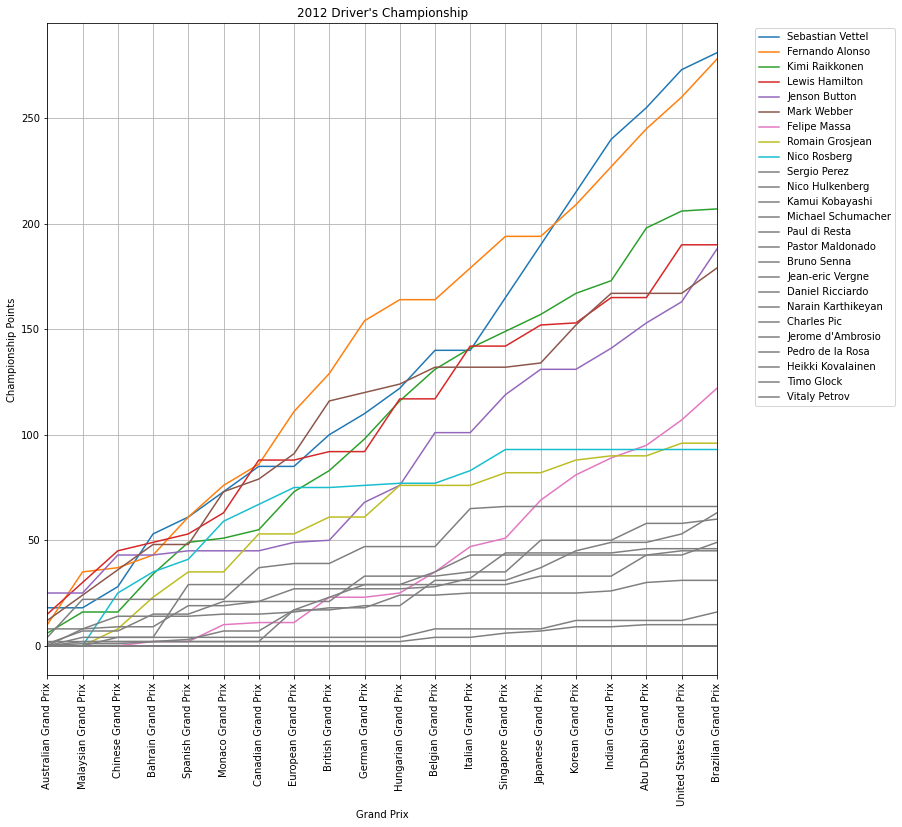

In [11]:

graph.plot(figsize=(12,12),color=c)

plt.title("2012 Driver's Championship")
plt.legend(bbox_to_anchor = (1.05, 1))
plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
plt.ylabel('Championship Points')
plt.margins(x=0)
plt.grid()

plt.savefig('2012 Driver Points.jpeg',bbox_inches='tight')
plt.show()


In [12]:
name=graph.iloc[[-1]].index[0]
name

'Brazilian Grand Prix'

In [13]:
EndingPoints=graph.loc[['Brazilian Grand Prix']].transpose()
EndingPoints.rename({name:'Season Finishing Points'},axis=1,inplace=True)
EndingPoints.columns.name = None
EndingPoints.sort_values('Season Finishing Points',ascending=False,inplace=True)
EndingPoints

,Season Finishing Points
Driver Names,
Sebastian Vettel,281
Fernando Alonso,278
Kimi Raikkonen,207
Lewis Hamilton,190
Jenson Button,188
Mark Webber,179
Felipe Massa,122
Romain Grosjean,96
Nico Rosberg,93


In [14]:
EndingPoints.describe()

,Season Finishing Points
count,25.000000
mean,80.800000
std,89.418492
min,0.000000
25%,0.000000
50%,49.000000
75%,122.000000
max,281.000000


In [15]:
def DriverChamp(url,year):
    #read in file with either file path to csv or raw file url lunk
    df=pd.read_csv(url)
    
    #Combine names into one full-name
    df['Driver Names'] = df['forename']+' '+df['surname']
    
    #Create Pivot table to graph data from
    races= pd.pivot_table(df,index=['raceId'], columns='Driver Names',values='points')
    races.fillna(0,inplace=True)
    races.insert(0,'Grand Prix',df['name'].unique())
    races.set_index('Grand Prix',inplace=True)

    #Create a copy data frame
    graph=races.copy()
    
    #Creating a rolling sum from race points
    #Each race will add points onto previous sum
    i=1
    while i != len(races.index):
        graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
        i=i+1
    graph=graph.astype(int)
    
    #Grab name of last row
    #Last row shows the total sum of all the race points
    name=graph.iloc[[-1]].index[0]
    
    #Sort driver columns by end-of-season points
    graph=graph.sort_values(by=name, ascending=False,axis=1)
    
    #Table of end-of-season points
    EndingPoints=graph.iloc[[-1]].transpose()
    name=graph.iloc[[-1]].index[0]
    EndingPoints.rename({name:'Season Finishing Points'},axis=1,inplace=True)
    EndingPoints.columns.name = None
    EndingPoints.sort_values('Season Finishing Points',ascending=False,inplace=True)
    print(EndingPoints)

    #Create a list of 9 colors, minus gray
    colors=[]
    for key, value in mcolors.TABLEAU_COLORS.items():
        if key!='tab:gray':
            colors.append(value)
    
    #We are assigning colors to the top 9 drivers in terms of points
    #As well as assigning gray to the other drivers
    #POSSIBLE CHANGE FOR FUTURE: Assign colors to only those competing for championship at last race
    c=[]
    graph.iloc[-1]
    for points in graph.iloc[-1]:
        if points < graph.iloc[-1].nlargest(n=10)[8]:
            c.append('#7f7f7f')
        else:
            c.append(colors.pop(0))
    
    #Graphing
    graph.plot(figsize=(12,12),color=c)

    plt.title(f"{year} Driver's Championship",fontsize=15)
    plt.legend(bbox_to_anchor = (1.05, 1))
    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
    plt.ylabel('Championship Points')
    plt.margins(x=0)
    plt.grid()

    plt.savefig(f'{year} Driver Points.jpeg',bbox_inches='tight')
    plt.show()

    #Points Data
    print(EndingPoints.describe())

                    Season Finishing Points
Driver Names                               
Sebastian Vettel                        281
Fernando Alonso                         278
Kimi Raikkonen                          207
Lewis Hamilton                          190
Jenson Button                           188
Mark Webber                             179
Felipe Massa                            122
Romain Grosjean                          96
Nico Rosberg                             93
Sergio Perez                             66
Nico Hulkenberg                          63
Kamui Kobayashi                          60
Michael Schumacher                       49
Paul di Resta                            46
Pastor Maldonado                         45
Bruno Senna                              31
Jean-eric Vergne                         16
Daniel Ricciardo                         10
Narain Karthikeyan                        0
Charles Pic                               0
Jerome d'Ambrosio               

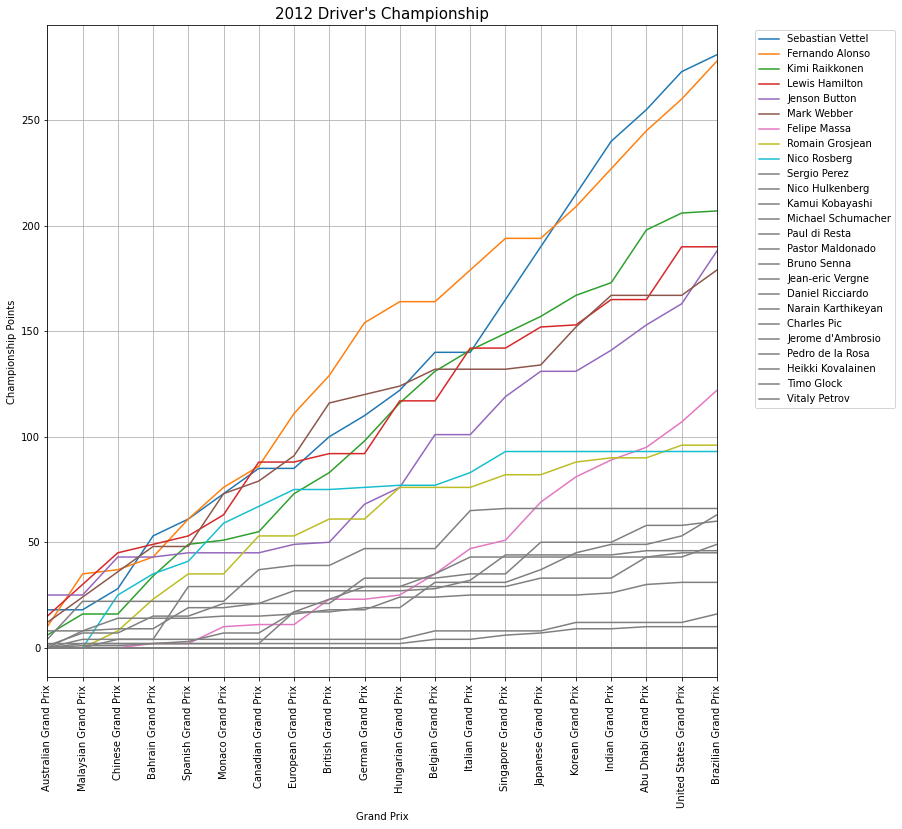

       Season Finishing Points
count                25.000000
mean                 80.800000
std                  89.418492
min                   0.000000
25%                   0.000000
50%                  49.000000
75%                 122.000000
max                 281.000000


In [16]:
url='F1QueryResults/F1RaceTimeline2012.csv'
DriverChamp(url,2012)

                      Season Finishing Points
Driver Names                                 
Kimi Raikkonen                            110
Fernando Alonso                           109
Lewis Hamilton                            109
Felipe Massa                               94
Nick Heidfeld                              61
Robert Kubica                              39
Heikki Kovalainen                          30
Giancarlo Fisichella                       21
Nico Rosberg                               20
David Coulthard                            14
Alexander Wurz                             13
Mark Webber                                10
Jarno Trulli                                8
Jenson Button                               6
Sebastian Vettel                            6
Ralf Schumacher                             5
Takuma Sato                                 4
Vitantonio Liuzzi                           3
Adrian Sutil                                1
Markus Winkelhock                 

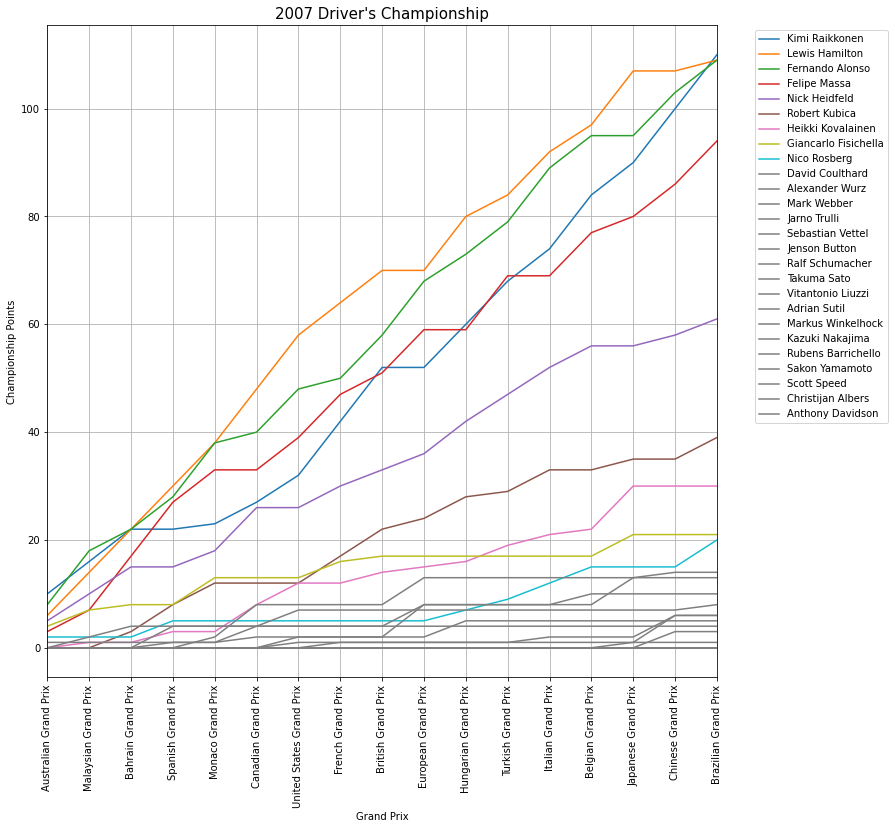

       Season Finishing Points
count                26.000000
mean                 25.500000
std                  37.643857
min                   0.000000
25%                   0.250000
50%                   7.000000
75%                  27.750000
max                 110.000000


In [17]:
url2='F1QueryResults/F1RaceTimeline2007.csv'
DriverChamp(url2,2007)

# using a csv that includes every race

In [18]:
url='F1QueryResults/F1EveryRace.csv'
er=pd.read_csv(url)
er.head()

,raceId,year,name,forename,surname,Constructor,finishingPosition,points
0,1,2009,Australian Grand Prix,Jenson,Button,Brawn,1,10
1,1,2009,Australian Grand Prix,Rubens,Barrichello,Brawn,2,8
2,1,2009,Australian Grand Prix,Jarno,Trulli,Toyota,3,6
3,1,2009,Australian Grand Prix,Timo,Glock,Toyota,4,5
4,1,2009,Australian Grand Prix,Fernando,Alonso,Renault,5,4


In [19]:
er.tail()

,raceId,year,name,forename,surname,Constructor,finishingPosition,points
24996,1074,2022,Bahrain Grand Prix,Nicholas,Latifi,Williams,16,0
24997,1074,2022,Bahrain Grand Prix,Nico,Hulkenberg,Aston Martin,17,0
24998,1074,2022,Bahrain Grand Prix,Sergio,Perez,Red Bull,18,0
24999,1074,2022,Bahrain Grand Prix,Max,Verstappen,Red Bull,19,0
25000,1074,2022,Bahrain Grand Prix,Pierre,Gasly,AlphaTauri,20,0


In [20]:
er['year'].min()
#earliest recorded season 1950

1950

In [21]:
er['year'].max()
#latest record year 2022

2022

In [22]:
def DriversChamp(year):
    #Function to ouptut and graph desired F1 Season

    #read in file with either file path to csv or raw file url lunk
    url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
    df=pd.read_csv(url)
    df=df[df['year']==year]

    #Combine names into one full-name
    df['Driver Names'] = df['forename']+' '+df['surname']
    
    #Create Pivot table to graph data from
    races= pd.pivot_table(df,index=['raceId'], columns='Driver Names',values='points')
    races.fillna(0,inplace=True)
    races.insert(0,'Grand Prix',df['name'].unique())
    races.set_index('Grand Prix',inplace=True)

    #Create a copy data frame
    graph=races.copy()
    
    #Creating a rolling sum from race points
    #Each race will add points onto previous sum
    i=1
    while i != len(races.index):
        graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
        i=i+1
    graph=graph.astype(int)
    
    #Grab name of last row
    #Last row shows the total sum of all the race points
    name=graph.iloc[[-1]].index[0]
    
    #Sort driver columns by end-of-season points
    graph=graph.sort_values(by=name, ascending=False,axis=1)
    
    #Table of end-of-season points
    EndingPoints=graph.iloc[[-1]].transpose()
    name=graph.iloc[[-1]].index[0]
    EndingPoints.rename({name:'Season Finishing Points'},axis=1,inplace=True)
    EndingPoints.columns.name = None
    EndingPoints.sort_values('Season Finishing Points',ascending=False,inplace=True)
    print(EndingPoints)

    #Create a list of 9 colors, minus gray
    colors=[]
    for key, value in mcolors.BASE_COLORS.items():
        if key!='tab:gray':
            colors.append(value)
    
    #We are assigning colors to the top 9 drivers in terms of points
    #As well as assigning gray to the other drivers
    #POSSIBLE CHANGE FOR FUTURE: Assign colors to only those competing for championship at last race
    c=[]
    graph.iloc[-1]
    for points in graph.iloc[-1]:
        if points < graph.iloc[-1].nlargest(n=5)[4]:
            c.append('#7f7f7f')
        else:
            c.append(colors.pop(0))
    
    #Graphing
    graph.plot(figsize=(12,12),color=c)

    plt.title(f"{year} Driver's Championship",fontsize=15)
    plt.legend(bbox_to_anchor = (1.05, 1),title='Drivers in order of points')
    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
    plt.ylabel('Championship Points')
    plt.margins(x=0)
    plt.grid()

    plt.savefig(f'{year} Driver Points.jpeg',bbox_inches='tight')
    plt.show()

    #Points Data
    print(EndingPoints.describe())

                Season Finishing Points
Driver Names                           
Jim Clark                            73
Richie Ginther                       34
Graham Hill                          29
John Surtees                         22
Dan Gurney                           19
...                                 ...
Tim Parnell                           0
Tony Settember                        0
Trevor Blokdyk                        0
Mike Hailwood                         0
Willy Mairesse                        0

[62 rows x 1 columns]


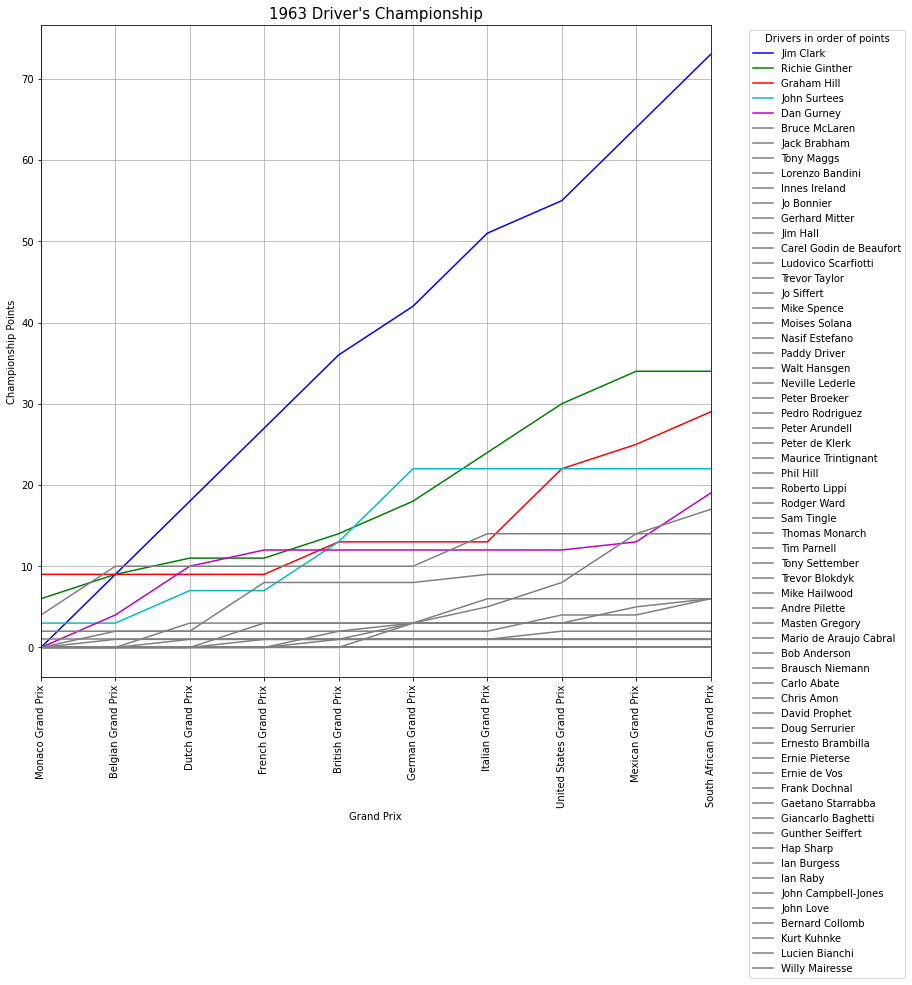

       Season Finishing Points
count                62.000000
mean                  3.967742
std                  11.375798
min                   0.000000
25%                   0.000000
50%                   0.000000
75%                   1.000000
max                  73.000000


In [23]:
url='F1QueryResults/F1EveryRace.csv'
DriversChamp(1963)

# Constructor Championship

In [125]:
def ConstructorsChamp(year): 
    url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
    df=pd.read_csv(url)
    df=df[df['year']==year]

    races= df.pivot_table(index='raceId',columns='Constructor', values='points', aggfunc='sum')
    races.fillna(0,inplace=True)
    races.insert(0,'Grand Prix',df['name'].unique())
    races.set_index('Grand Prix',inplace=True)

    #Create a copy data frame
    graph=races.copy()
    
    #Creating a rolling sum from race points
    #Each race will add points onto previous sum
    i=1
    while i != len(races.index):
        graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
        i=i+1
    graph=graph.astype(int)
    
    #Grab name of last row
    #Last row shows the total sum of all the race points
    name=graph.iloc[[-1]].index[0]
    
    #Sort driver columns by end-of-season points
    graph=graph.sort_values(by=name, ascending=False,axis=1)
    
    #Table of end-of-season points
    EndingPoints=graph.iloc[[-1]].transpose()
    name=graph.iloc[[-1]].index[0]
    EndingPoints.rename({name:f"{year}'s Top 5 Season Finishing Points"},axis=1,inplace=True)
    EndingPoints.columns.name = None
    EndingPoints.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
    print(EndingPoints.head())

    #Create a list of 9 colors, minus gray
    colors=[]
    for key, value in mcolors.BASE_COLORS.items():
        if key!='tab:gray':
            colors.append(value)
    
    #We are assigning colors to the top 9 drivers in terms of points
    #As well as assigning gray to the other drivers
    #POSSIBLE CHANGE FOR FUTURE: Assign colors to only those competing for championship at last race
    c=[]
    graph.iloc[-1]
    for points in graph.iloc[-1]:
        if points < graph.iloc[-1].nlargest(n=5)[4]:
            c.append('#7f7f7f')
        else:
            c.append(colors.pop(0))
    
    #Graphing
    graph.plot(figsize=(12,12),color=c)

    plt.title(f"{year} Constructors's Championship",fontsize=15)
    plt.legend(bbox_to_anchor = (1.05, 1),title='Constructors, in order of points')
    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
    plt.ylabel('Championship Points')
    plt.margins(x=0)
    plt.grid()

    plt.savefig('GraphsImages/'+f'{year} Constructor Points.jpeg',bbox_inches='tight')
    plt.show()


             1994's Top 5 Season Finishing Points
Constructor                                      
Williams                                      118
Benetton                                      103
Ferrari                                        71
McLaren                                        42
Jordan                                         28


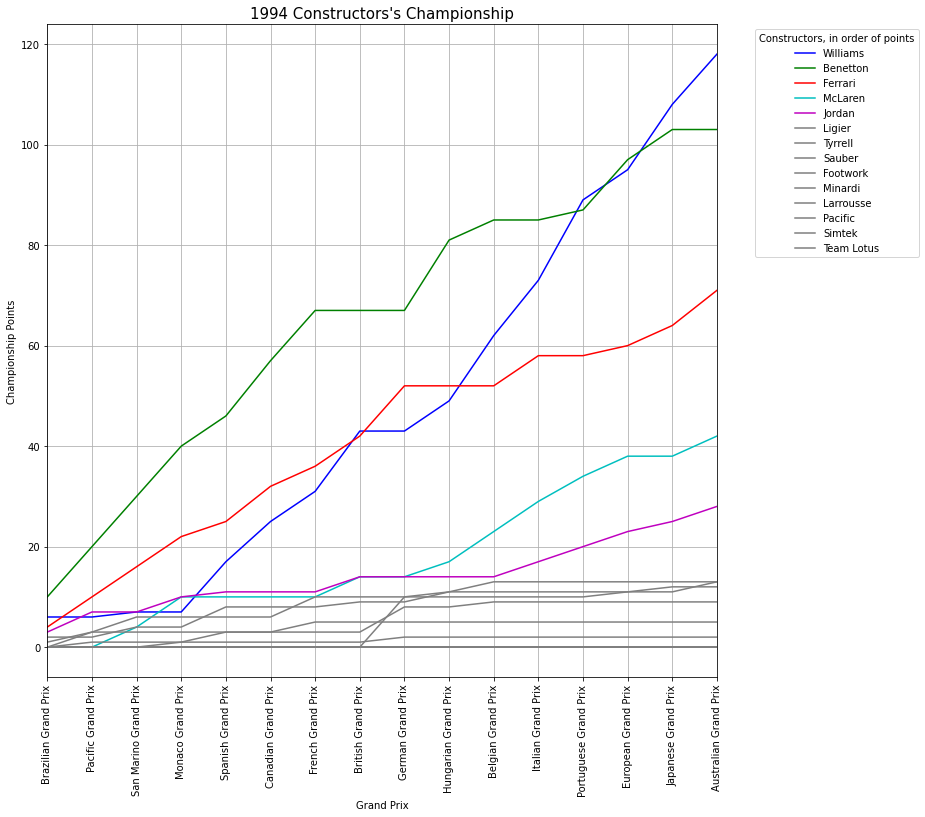

In [127]:
ConstructorsChamp(1994)

# Now exploring and plotting both the Drivers and Constructors Champ

In [212]:
url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
df=pd.read_csv(url)
df=df[df['year']==year]

races= df.pivot_table(index='raceId',columns='Constructor', values='points', aggfunc='sum')
races.fillna(0,inplace=True)
races.insert(0,'Grand Prix',df['name'].unique())
races.set_index('Grand Prix',inplace=True)

#Create a copy data frame
graph=races.copy()
graph

Constructor,BMW Sauber,Ferrari,Force India,Honda,McLaren,Red Bull,Renault,Super Aguri,Toro Rosso,Toyota,Williams
Grand Prix,,,,,,,,,,,
Australian Grand Prix,8.0,1.0,0.0,0.0,14.0,0.0,5.0,0.0,2.0,0.0,9.0
Malaysian Grand Prix,11.0,10.0,0.0,0.0,10.0,2.0,1.0,0.0,0.0,5.0,0.0
Bahrain Grand Prix,11.0,18.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,3.0,1.0
Spanish Grand Prix,5.0,18.0,0.0,3.0,6.0,4.0,0.0,0.0,0.0,1.0,2.0
Turkish Grand Prix,9.0,16.0,0.0,0.0,8.0,2.0,3.0,0.0,0.0,0.0,1.0
Monaco Grand Prix,8.0,6.0,0.0,3.0,11.0,5.0,0.0,0.0,4.0,0.0,2.0
Canadian Grand Prix,18.0,4.0,0.0,2.0,0.0,6.0,0.0,0.0,1.0,8.0,0.0
French Grand Prix,4.0,18.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,6.0,0.0
British Grand Prix,8.0,5.0,0.0,6.0,14.0,0.0,3.0,0.0,0.0,2.0,1.0


In [259]:
url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
df=pd.read_csv(url)
df=df[df['year']==2008]

    #Combine names into one full-name
df['Driver Name'] = df['forename']+' '+df['surname']
    
    #Create Pivot table to graph data from
races= pd.pivot_table(df,index=['raceId'], columns=['Driver Name','Constructor'],values='points')
races.fillna(0,inplace=True)
races.insert(0,'Grand Prix',df['name'].unique())
races.set_index('Grand Prix',inplace=True)
graph=races.copy()
#Create a copy data frame
graph=races.copy()
graph2=races.copy()
graph2 = graph2.groupby(graph2.columns.get_level_values(1),axis=1).sum()



year=2008
i=1
while i != len(races.index):
    graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
    i=i+1


i=1    
while i != len(races.index):
    graph2.iloc[i]=graph2.iloc[i]+graph2.iloc[i-1]
    i=i+1
    
#graph=graph.astype(int)
#graph=graph.sort_values(by=name, ascending=False,axis=1)

graph2 = graph2.astype(int)
graph2 = graph2.sort_values(by=name, ascending=False,axis=1)
graph2

Constructor,Ferrari,McLaren,BMW Sauber,Renault,Toyota,Toro Rosso,Red Bull,Williams,Honda,Force India,Super Aguri
Grand Prix,,,,,,,,,,,
Australian Grand Prix,1,14,8,5,0,2,0,9,0,0,0
Malaysian Grand Prix,11,24,19,6,5,2,2,9,0,0,0
Bahrain Grand Prix,29,28,30,6,8,2,4,10,0,0,0
Spanish Grand Prix,47,34,35,6,9,2,8,12,3,0,0
Turkish Grand Prix,63,42,44,9,9,2,10,13,3,0,0
Monaco Grand Prix,69,53,52,9,9,6,15,15,6,0,0
Canadian Grand Prix,73,53,70,9,17,7,21,15,8,0,0
French Grand Prix,91,58,74,12,23,7,24,15,8,0,0
British Grand Prix,96,72,82,15,25,7,24,16,14,0,0


In [260]:
url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
df=pd.read_csv(url)
df=df[df['year']==2008]

    #Combine names into one full-name
df['Driver Name'] = df['forename']+' '+df['surname']
    
    #Create Pivot table to graph data from
races= pd.pivot_table(df,index=['raceId'], columns=['Driver Name','Constructor'],values='points')
races.fillna(0,inplace=True)
races.insert(0,'Grand Prix',df['name'].unique())
races.set_index('Grand Prix',inplace=True)
graph=races.copy()
#Create a copy data frame
graph=races.copy()
graph2=races.copy()
graph2 = graph2.groupby(graph2.columns.get_level_values(1),axis=1).sum()



year=2008
i=1
while i != len(races.index):
    graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
    i=i+1

i=1
while i != len(races.index):
    graph2.iloc[i]=graph2.iloc[i]+graph2.iloc[i-1]
    i=i+1


graph=graph.astype(int)
graph=graph.sort_values(by=name, ascending=False,axis=1)

graph2=graph2.astype(int)
graph2 = graph2.sort_values(by=name, ascending=False,axis=1)

EndingPoints=graph.iloc[[-1]].transpose()
name=graph.iloc[[-1]].index[0]
#name
EndingPoints.rename({name:f"{year}'s Top 5 Season Finishing Points"},axis=1,inplace=True)
EndingPoints.columns.name = None
# EndingPoints.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
#print(EndingPoints.head())
# Top 5 Constructors
constr =EndingPoints.droplevel(level=0)
constr = constr.groupby(constr.index)[f"{year}'s Top 5 Season Finishing Points"].sum().reset_index()
constr= constr.set_index('Constructor')
constr.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
constr.rename({f"{year}'s Top 5 Season Finishing Points":f"{year}'s Top 5 Constructors by Points"},axis=1,inplace=True)
#print(constr.head())


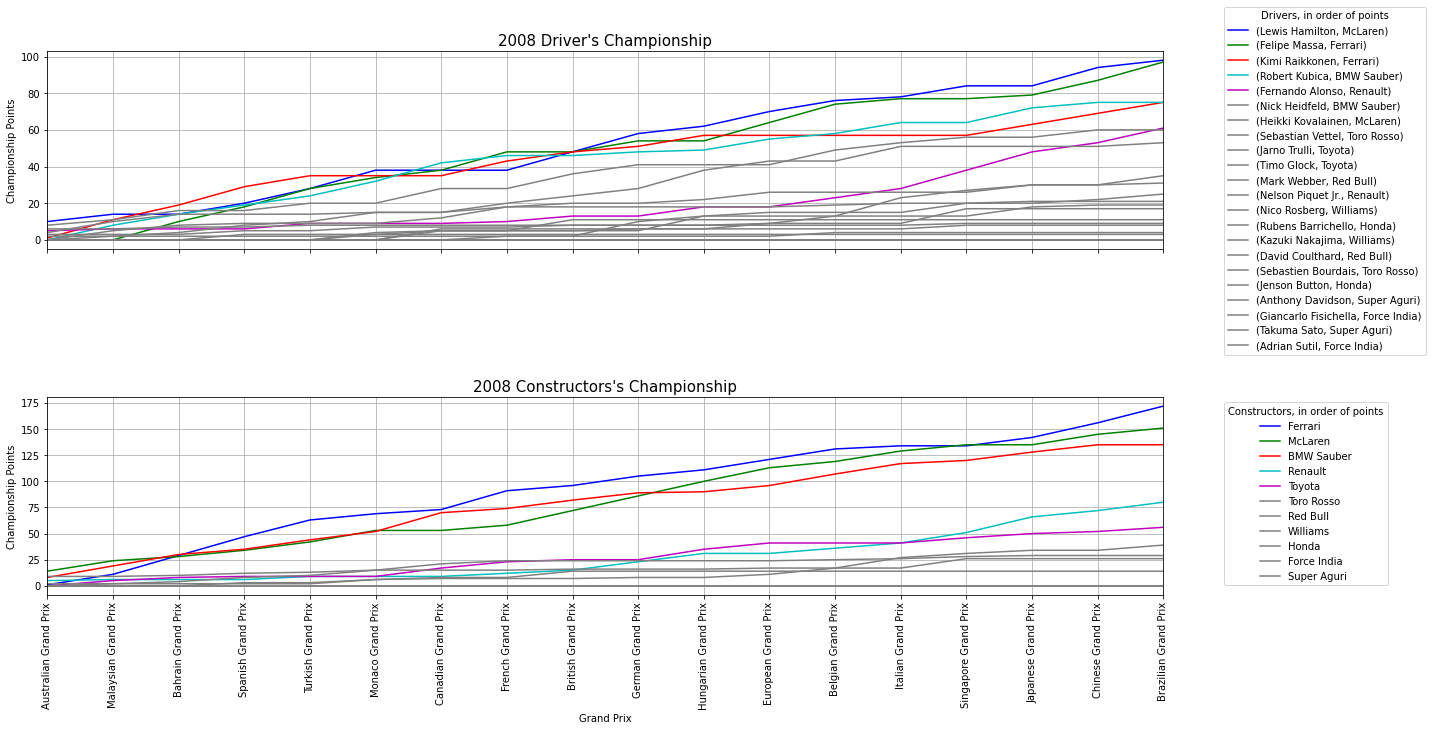

In [311]:
colors=[]
for key, value in mcolors.BASE_COLORS.items():
    if key!='tab:gray':
        colors.append(key)

#We are assigning colors to the top 5 drivers in terms of points
#As well as assigning gray to the other drivers
#POSSIBLE CHANGE FOR FUTURE: Assign colors to only those competing for championship at last race
c=[]
graph.iloc[-1]
for points in graph.iloc[-1]:
    if points < graph.iloc[-1].nlargest(n=5)[4]:
        c.append('gray')
    else:
        c.append(colors.pop(0))
        
        
#Graphing
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(20,10),sharex=True)
fig.subplots_adjust(hspace=0.75)

plt.xticks(np.arange(len(graph)),graph.index,rotation=90)

graph.plot(ax=axes[0],color=c)
graph2.plot(ax=axes[1],color=c)

axes[0].grid(True)
axes[1].grid(True)
#axes[0].legend(handles=handles,bbox_to_anchor = (1.05, 1),title='Constructors, in order of points')

plt.margins(x=0)

axes[0].legend(bbox_to_anchor = (1.05, 1.25),title='Drivers, in order of points')
axes[1].legend(bbox_to_anchor = (1.05, 1),title='Constructors, in order of points')

plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
axes[0].set_ylabel('Championship Points')
axes[1].set_ylabel('Championship Points')

axes[0].set_title(f"{year} Driver's Championship",fontsize=15)
axes[1].set_title(f"{year} Constructors's Championship",fontsize=15)

#plt.savefig('GraphsImages/'+f'{year} Constructor Points.jpeg',bbox_inches='tight')
plt.show()



In [314]:
def Championship(year):
    # Outputs drivers and constructors championship of desired year
    url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1EveryRace.csv'
    df=pd.read_csv(url)
    df=df[df['year']==year]

    #Combine names into one full-name
    df['Driver Name'] = df['forename']+' '+df['surname']

    #Create Pivot table to graph data from
    races= pd.pivot_table(df,index=['raceId'], columns=['Driver Name','Constructor'],values='points')
    races.fillna(0,inplace=True)
    races.insert(0,'Grand Prix',df['name'].unique())
    races.set_index('Grand Prix',inplace=True)
    graph=races.copy()
    #Create a copy data frame
    graph=races.copy()
    graph2=races.copy()
    graph2 = graph2.groupby(graph2.columns.get_level_values(1),axis=1).sum()

    #Create a rolling sum, so after each race, the points are added
    i=1
    while i != len(races.index):
        graph.iloc[i]=graph.iloc[i]+graph.iloc[i-1]
        i=i+1

    i=1
    while i != len(races.index):
        graph2.iloc[i]=graph2.iloc[i]+graph2.iloc[i-1]
        i=i+1

    #Grab name of last row
    #Last row shows the total sum of all the race points
    name=graph.iloc[[-1]].index[0]
    
    graph=graph.astype(int)
    graph=graph.sort_values(by=name, ascending=False,axis=1)

    graph2=graph2.astype(int)
    graph2 = graph2.sort_values(by=name, ascending=False,axis=1)
    

    EndingPoints=graph.iloc[[-1]].transpose()
    name=graph.iloc[[-1]].index[0]

    EndingPoints.rename({name:f"{year}'s Top 5 Season Finishing Points"},axis=1,inplace=True)
    EndingPoints.columns.name = None
    # EndingPoints.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
    print(EndingPoints.head())
    constr =EndingPoints.droplevel(level=0)
    constr = constr.groupby(constr.index)[f"{year}'s Top 5 Season Finishing Points"].sum().reset_index()
    constr= constr.set_index('Constructor')
    constr.sort_values(f"{year}'s Top 5 Season Finishing Points",ascending=False,inplace=True)
    constr.rename({f"{year}'s Top 5 Season Finishing Points":f"{year}'s Top 5 Constructors by Points"},axis=1,inplace=True)
    print(constr.head())

    colors=[]
    for key, value in mcolors.BASE_COLORS.items():
        if key!='tab:gray':
            colors.append(key)

    #We are assigning colors to the top 5 drivers and constructors in terms of points
    #As well as assigning gray to the other drivers
    c=[]
    graph.iloc[-1]
    for points in graph.iloc[-1]:
        if points < graph.iloc[-1].nlargest(n=5)[4]:
            c.append('gray')
        else:
            c.append(colors.pop(0))


    #Graphing
    fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(20,10),sharex=True)
    fig.subplots_adjust(hspace=0.75)

    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)

    graph.plot(ax=axes[0],color=c)
    graph2.plot(ax=axes[1],color=c)

    axes[0].grid(True)
    axes[1].grid(True)
    #axes[0].legend(handles=handles,bbox_to_anchor = (1.05, 1),title='Constructors, in order of points')

    plt.margins(x=0)

    axes[0].legend(bbox_to_anchor = (1.05, 1.25),title='Drivers, in order of points')
    axes[1].legend(bbox_to_anchor = (1.05, 1),title='Constructors, in order of points')

    plt.xticks(np.arange(len(graph)),graph.index,rotation=90)
    axes[0].set_ylabel('Championship Points')
    axes[1].set_ylabel('Championship Points')

    axes[0].set_title(f"{year} Driver's Championship",fontsize=15)
    axes[1].set_title(f"{year} Constructors's Championship",fontsize=15)

    #plt.savefig('GraphsImages/'+f'{year} Constructor Points.jpeg',bbox_inches='tight')
    plt.show()



                             2008's Top 5 Season Finishing Points
Driver Name     Constructor                                      
Lewis Hamilton  McLaren                                        98
Felipe Massa    Ferrari                                        97
Kimi Raikkonen  Ferrari                                        75
Robert Kubica   BMW Sauber                                     75
Fernando Alonso Renault                                        61
             2008's Top 5 Constructors by Points
Constructor                                     
Ferrari                                      172
McLaren                                      151
BMW Sauber                                   135
Renault                                       80
Toyota                                        56


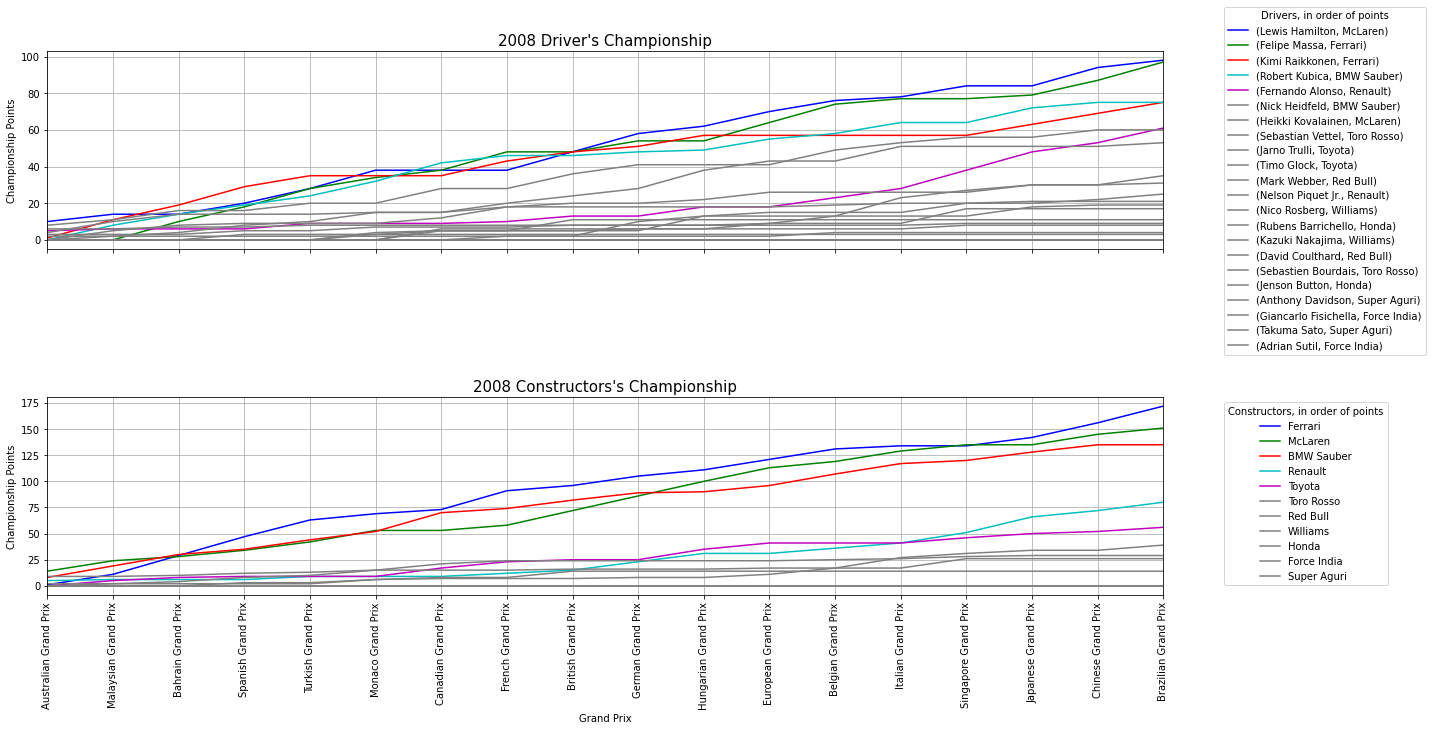

In [315]:
Championship(2008)